In [12]:
import pandas as pd
import matplotlib as plt
import seaborn as sns
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

#### Open the dataset

In [13]:
titanic = pd.read_csv("dataset/titanic.csv", sep = ",")

#### Data exploration


In [14]:
titanic.head(20)

,Survived,Pclass,Name,Sex,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare
0,0,3,Mr. Owen Harris Braund,male,22.0,1,0,7.2500
1,1,1,Mrs. John Bradley (Florence Briggs Thayer) Cum...,female,38.0,1,0,71.2833
2,1,3,Miss. Laina Heikkinen,female,26.0,0,0,7.9250
3,1,1,Mrs. Jacques Heath (Lily May Peel) Futrelle,female,35.0,1,0,53.1000
4,0,3,Mr. William Henry Allen,male,35.0,0,0,8.0500
5,0,3,Mr. James Moran,male,27.0,0,0,8.4583
6,0,1,Mr. Timothy J McCarthy,male,54.0,0,0,51.8625
7,0,3,Master. Gosta Leonard Palsson,male,2.0,3,1,21.0750
8,1,3,Mrs. Oscar W (Elisabeth Vilhelmina Berg) Johnson,female,27.0,0,2,11.1333
9,1,2,Mrs. Nicholas (Adele Achem) Nasser,female,14.0,1,0,30.0708


#### Drop columns

In [15]:
print(titanic.shape)
drop_columns = ['Fare', 'Name']
titanic.drop(drop_columns, axis = "columns", inplace = True)
print(titanic.shape)


(887, 8)
(887, 6)


### Rename columns

In [16]:
print(titanic.head(1))
titanic.columns = ['Survived', 'Pclass','Sex','Age','SSA','PCOB']
print(titanic.head(1))

   Survived  Pclass   Sex   Age  Siblings/Spouses Aboard  \
0         0       3  male  22.0                        1   

   Parents/Children Aboard  
0                        0  
   Survived  Pclass   Sex   Age  SSA  PCOB
0         0       3  male  22.0    1     0


### Visualize the types of data

In [17]:
titanic.dtypes

Survived      int64
Pclass        int64
Sex          object
Age         float64
SSA           int64
PCOB          int64
dtype: object

### Change Data type. Handle categorical data

In [18]:
titanic.Sex = titanic.Sex.apply(lambda x : 1 if x== "male" else 0)
titanic.dtypes

Survived      int64
Pclass        int64
Sex           int64
Age         float64
SSA           int64
PCOB          int64
dtype: object

In [19]:
titanic.head()

,Survived,Pclass,Sex,Age,SSA,PCOB
0,0,3,1,22.0,1,0
1,1,1,0,38.0,1,0
2,1,3,0,26.0,0,0
3,1,1,0,35.0,1,0
4,0,3,1,35.0,0,0


### Order columns

In [20]:
titanic = titanic [['Survived','Pclass', 'Sex',  'Age', 'SSA', 'PCOB']]
titanic.head()

,Survived,Pclass,Sex,Age,SSA,PCOB
0,0,3,1,22.0,1,0
1,1,1,0,38.0,1,0
2,1,3,0,26.0,0,0
3,1,1,0,35.0,1,0
4,0,3,1,35.0,0,0


### Decision tree training

In [21]:
features = titanic.drop({'Survived'}, axis=1)
target =  titanic.Survived

### Import libraries and test split

In [22]:

X_train, X_test,  y_train, y_test = train_test_split(features,target, test_size=0.3, random_state=42)

### Training

In [23]:

treeModel = DecisionTreeClassifier(max_depth=2, random_state=42)
treeModel.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=2, random_state=42)

### Evaluation of model

In [24]:
# Preditions calculation
y_train_prediction = treeModel.predict(X_train)
y_test_prediction = treeModel.predict(X_test)



In [25]:
# Calculation of metrics


#Calculation of training accuracy
train_accuracy = accuracy_score(y_train, y_train_prediction)
test_accuracy = accuracy_score(y_test, y_test_prediction)
print('The accuracy of train is:', train_accuracy)
print('The accuracy of train is:', test_accuracy)

The accuracy of train is: 0.8064516129032258
The accuracy of train is: 0.7378277153558053


### Verify the importance of the features

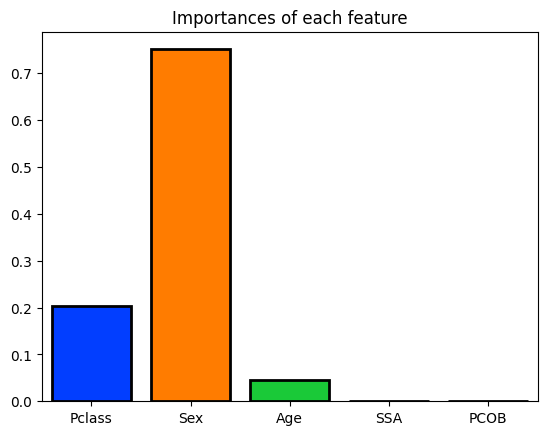

In [26]:
import seaborn as sns
import matplotlib.pyplot as plt

importances = treeModel.feature_importances_
columns = features.columns
data = pd.DataFrame([importances], columns=columns)

sns.barplot(data, palette='bright', saturation=2.0, edgecolor='black', linewidth=2)
plt.title('Importances of each feature')
plt.show()